# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [1]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

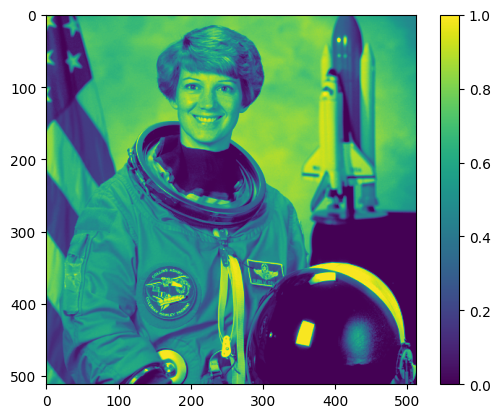

In [2]:
img = plt.imread('data/astronaut.png')
plt.figure()
plt.imshow(img)
plt.colorbar()

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [ ]:
#def meanfilter(img_in, size):
 #   imgF = img.copy()
  #  result = numpy.zeros(img_in.shape)
   # n = (size - 1) // 2
    #for p in numpy.ndindex(img_in.shape):
     #   neighborhood_sum = 0
      #  for q in numpy.ndindex(size, size):
            ...
   # return result

#print(img.shape[0])
#print(img.shape[1])
#print(img[15, 24])

In [36]:
def meanfilter(img_in, size):
    assert size % 2 == 1
    img_in = img_in.astype(float)
    img_out = img_in.copy()
    dis = size//2
    for p in numpy.ndindex(img_in.shape): #für alle einzelnen Pixel -> Rand beachten!
        if p[0] >= dis and p[0] < (img_in.shape[0]-dis) and p[1] >= dis and p[1] < (img_in.shape[1]-dis): #für alle Zellen die NICHT am Rand sind - Rand ist jeweils size/2-0,5
            listp = list(p)
            row = listp[0]
            column = listp[1]
            sum = 0
            for r in range (row-dis, row+dis+1):
                for c in range (column-dis, column+dis+1):
                    sum += img_in[r,c]
            mean = sum/(size*size)
            img_out[p] = mean

        else: #falls eine Zelle am Rand ist 
            img_out[p] = 0
    return img_out

    

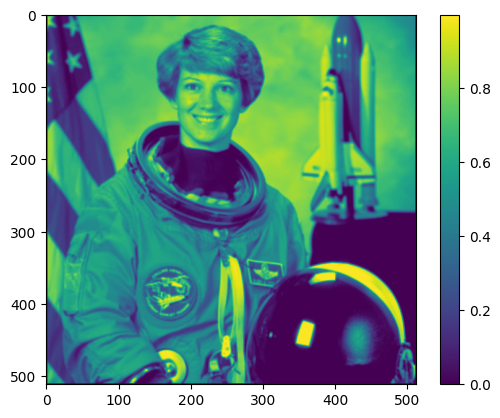

In [21]:
# ausprobieren
size = 3
img_out = img.copy()
dis = ((size/2)-0.5)
for p in numpy.ndindex(img.shape): #für alle einzelnen Pixel -> Rand beachten!
    if p[0] > dis and p[0] < (img.shape[0]-dis) and p[1] > dis and p[1] < (img.shape[0]-dis): #für alle Zellen die NICHT am Rand sind - Rand ist jeweils size/2-0,5
        listp = list(p)
        row = listp[0]
        column = listp[1]
        sum = 0
        for r in range (row-1, row+2):
            for c in range (column-1, column+2):
                sum += img[r,c]
        mean = sum/(size*size)
        img_out[p] = mean

    else: #falls eine Zelle am Rand ist 
           img_out[p] = 0
plt.figure()
plt.imshow(img_out)
plt.colorbar()


1


**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

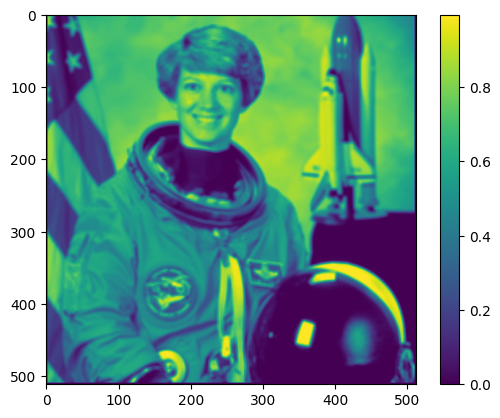

In [43]:
meanfilter(img, 7)
plt.figure()
plt.imshow(img_out)
plt.colorbar()

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

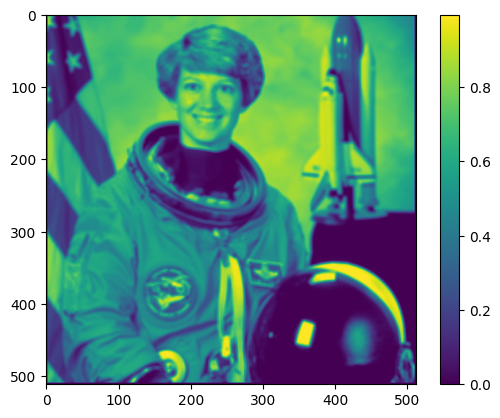

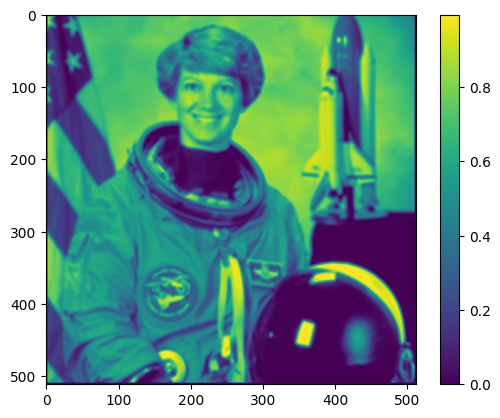

In [38]:
img_out = meanfilter(img, 5)
plt.figure()
plt.imshow(img_out)
plt.colorbar()

img5 = plt.imread('data/astronaut_meanfilter5.png')
plt.figure()
plt.imshow(img5)
plt.colorbar()

assert numpy.allclose(img_out, img5, atol=1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [ ]:
def medianfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    ...
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img_in, size):
    ...

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: